In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n_tab = [10,20,50,100,200,500,1000,2000,5000]
lambd_tab = ['0.3', '0.5', '0.7', '1.0']
colors = ['red', 'purple', 'blue', 'green']

names = []

for lambd in lambd_tab:
    for n in n_tab:
        names.append( "l_"+str(lambd) + "_n_" + str(n))

In [3]:
def read_data(filename):
    
    df = pd.read_csv(filename, skiprows = 2, names = names )
    df.dropna(inplace = True)
    df = df.apply(np.sqrt, axis = 1)
    
    points = []
    i = 0
    
    for col in names:       
        points.append([ n_tab[i%9], df[col].mean(), df[col].std()])
        i+=1

    df_list = pd.DataFrame(points,  columns = ['n', 'mean', 'std'])
    df_tab = [ df_list[0:9], df_list[9:18], df_list[18:27], df_list[27:] ]
    
    return df_tab


In [4]:
df_tab_10 = read_data('maxima_c=10.csv')
df_tab_15 = read_data('maxima_c=15.csv')
df_tab_20 = read_data('maxima_c=20.csv')

## Log scale

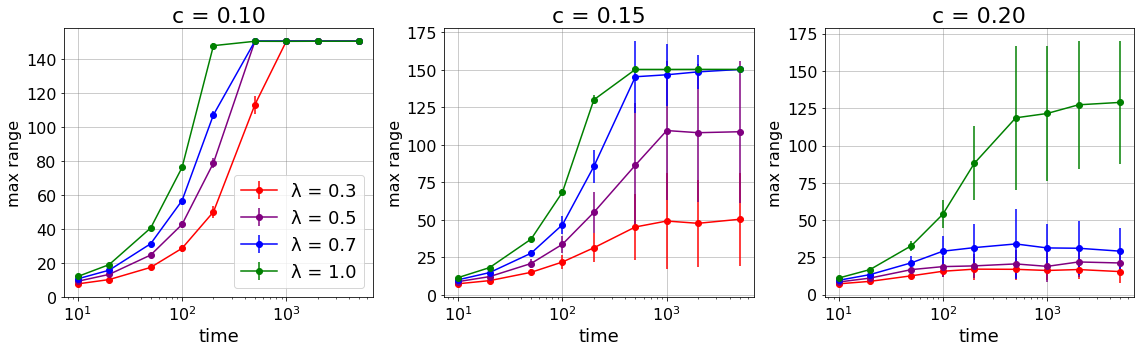

In [5]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, sharex = False, figsize = (16,5))

for ax in axs:
    ax.yaxis.label.set_size(16)
    ax.xaxis.label.set_size(18)
    ax.semilogx()
    ax.set_ylabel('max range')
    ax.set_xlabel('time')
    ax.tick_params(grid_color='gray', grid_alpha=0.5, labelcolor = "black", labelsize = 16)      
    ax.grid(True)
    #ax.set_xlim([0,5200])
    #ax.set_ylim([0,75])    

for i in range(4):
    axs[0].errorbar(df_tab_10[i]['n'], df_tab_10[i]['mean'], yerr = df_tab_10[i]['std'], 
                    color = colors[i], label= u'\u03BB = '+str(lambd_tab[i]) , fmt='-o')
    
    axs[1].errorbar(df_tab_15[i]['n'], df_tab_15[i]['mean'], yerr = df_tab_15[i]['std'], 
                    color = colors[i], label= u'\u03BB = '+str(lambd_tab[i]) , fmt='-o')
    
    axs[2].errorbar(df_tab_20[i]['n'], df_tab_20[i]['mean'], yerr = df_tab_20[i]['std'], 
                    color = colors[i], label= u'\u03BB = '+str(lambd_tab[i]) , fmt='-o')


axs[0].set_title('c = 0.10', fontsize = 22)
axs[1].set_title('c = 0.15', fontsize = 22)
axs[2].set_title('c = 0.20', fontsize = 22)


axs[0].legend(loc='lower right',fontsize = 18)

fig.tight_layout()
#fig.savefig("new")

            

In [6]:
def single_plot_log(df_tab, c, legend = False):
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1, sharex = False, figsize = (10,7))

    ax.yaxis.label.set_size(22)
    ax.xaxis.label.set_size(22)
    ax.semilogx()
    ax.set_ylabel('max range')
    ax.set_xlabel('time')
    ax.tick_params(grid_color='gray', grid_alpha=0.5, labelcolor = "black", labelsize = 20)      
    ax.grid(True)
   

    for i in range(4):
        ax.errorbar(df_tab[i]['n'], df_tab[i]['mean'], yerr = df_tab[i]['std'], 
                        color = colors[i], label= u'\u03BB = '+str(lambd_tab[i]) , fmt='-o')

    
    if legend:
        ax.legend(loc='lower right',fontsize = 24)

    filename = "plot_lambda_" + str(c)
    fig.savefig(filename)

            

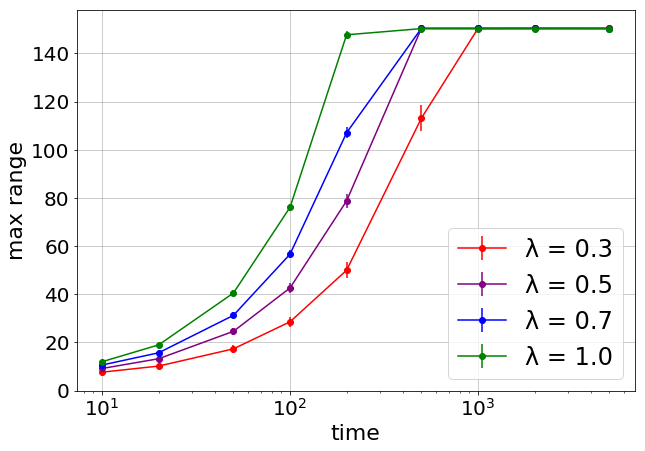

In [7]:
single_plot_log(df_tab_10, c = 10, legend = True)

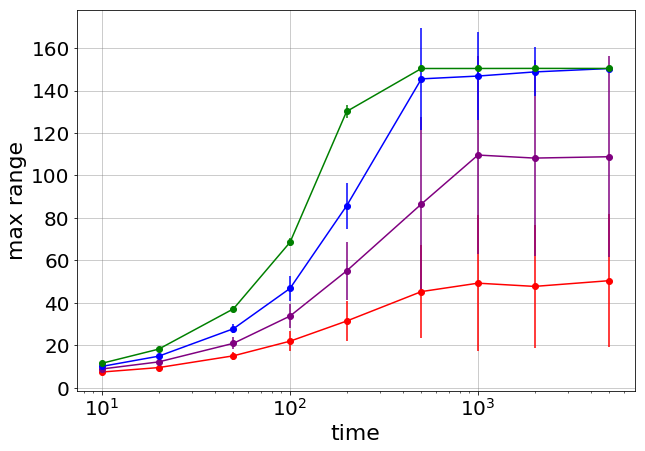

In [8]:
single_plot_log(df_tab_15, c = 15, legend = False)


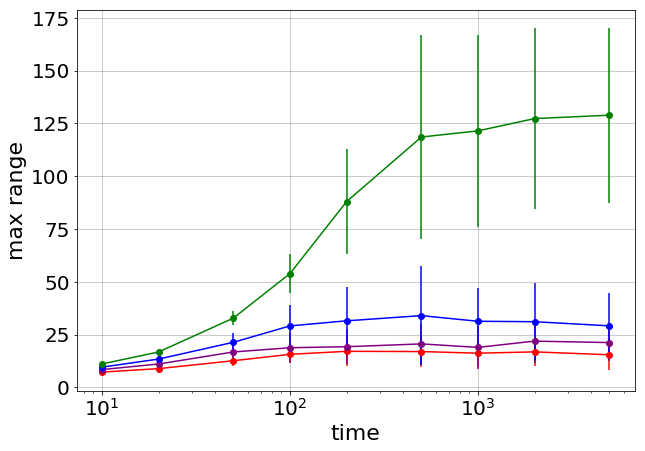

In [9]:
single_plot_log(df_tab_20, c = 20)

## Linear scale

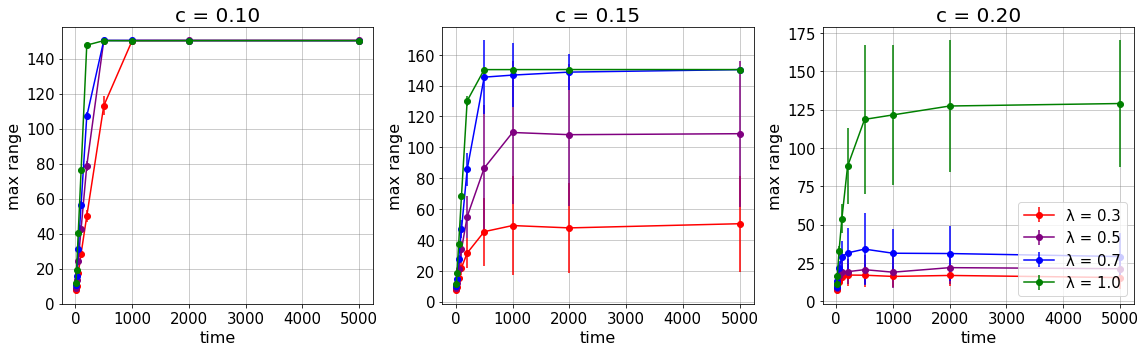

In [10]:
colors = ['red', 'purple', 'blue', 'green']

fig, axs = plt.subplots(nrows = 1, ncols = 3, sharex = False, figsize = (16,5))

for ax in axs:
    ax.yaxis.label.set_size(16)
    ax.xaxis.label.set_size(16)
    ax.set_ylabel('max range')
    ax.set_xlabel('time')
    ax.tick_params(grid_color='gray', grid_alpha=0.5, labelcolor = "black", labelsize = 15)      
    ax.grid(True)
    #ax.set_xlim([0,5200])
    #ax.set_ylim([0,75])    

for i in range(4):
    axs[0].errorbar(df_tab_10[i]['n'], df_tab_10[i]['mean'], yerr = df_tab_10[i]['std'], 
                    color = colors[i], label= u'\u03BB = '+str(lambd_tab[i]) , fmt='-o')
    
    axs[1].errorbar(df_tab_15[i]['n'], df_tab_15[i]['mean'], yerr = df_tab_15[i]['std'], 
                    color = colors[i], label= u'\u03BB = '+str(lambd_tab[i]) , fmt='-o')
    
    axs[2].errorbar(df_tab_20[i]['n'], df_tab_20[i]['mean'], yerr = df_tab_20[i]['std'], 
                    color = colors[i], label= u'\u03BB = '+str(lambd_tab[i]) , fmt='-o')


axs[0].set_title('c = 0.10', fontsize = 20)
axs[1].set_title('c = 0.15', fontsize = 20)
axs[2].set_title('c = 0.20', fontsize = 20)


axs[2].legend(loc='lower right',fontsize = 15)

fig.tight_layout()
#fig.savefig("new")

            